In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from espectro import espectro1D

pi = np.pi

índice de correlação^2 se reflete no percentual de semelhança entre os sinais

5e-05
2000


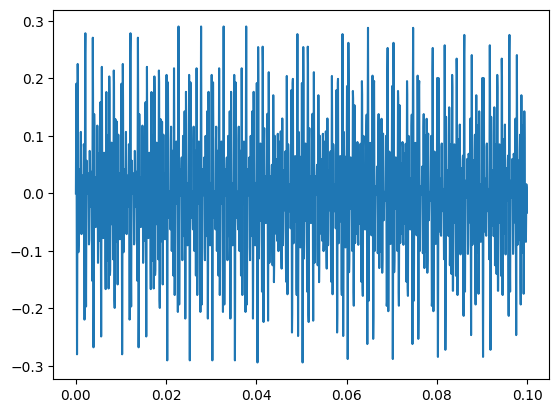

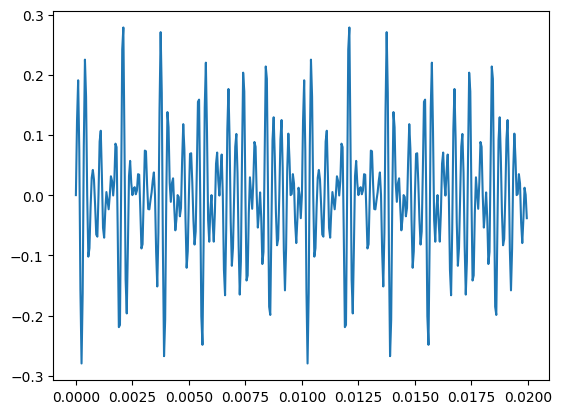

In [106]:
with open ('DTMF-s9.npy','rb') as arq:
    Ts1 = np.load(arq)
    sc2 = np.load(arq)

#primeiro passo é criar um vetor de tempo para o sinal
t = np.arange (0, len(sc2)*Ts1, Ts1)

print(Ts1)
print(len(sc2))

plt.figure(1)
plt.plot(t, sc2)
plt.show()

# aqui os digitos são divididos para a realização da fft de cada digito

digito1 = sc2[0   :400]
digito2 = sc2[400 :800]
digito3 = sc2[800 :1200]
digito4 = sc2[1200:1600]
digito5 = sc2[1600:2000]

# vetor de tempo dos digitos, não é mandatório
tdigito = np.arange(0, len(digito1)*Ts1, Ts1)

plt.figure(2)
plt.plot(tdigito, digito1)
plt.show()



400
400
400
201


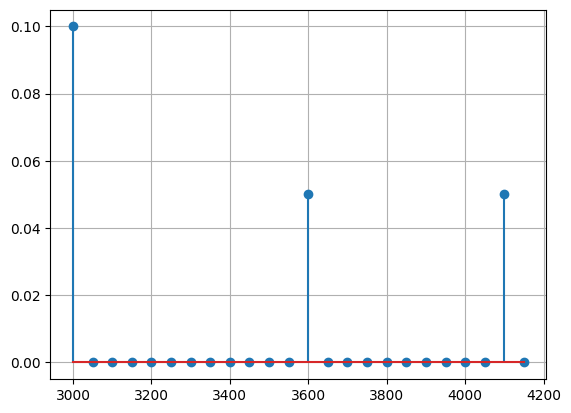

In [107]:
#Digito 1

N = len(digito1) #quantidade de amostras por digito, no caso, todos os digitos tem a mesma qunatidade de amostras
print(N)

D1 = np.fft.fft(digito1)
print(len(D1))

fs = 1/Ts1 # mesmo valor para todos os digitos
df = fs/N # mesmo valor para todos os digitos
f = np.arange(0, fs, df) # mesmo vetor para todos os digitos
print(len(f))

print(len(2*abs(D1[0:int(np.floor(N/2))+1])/N))

plt.figure(3)
plt.stem(f[60:84],2*abs(D1[60:84])/N) #região onde temos a prtadora e a mensagem
plt.grid(True)



400
400


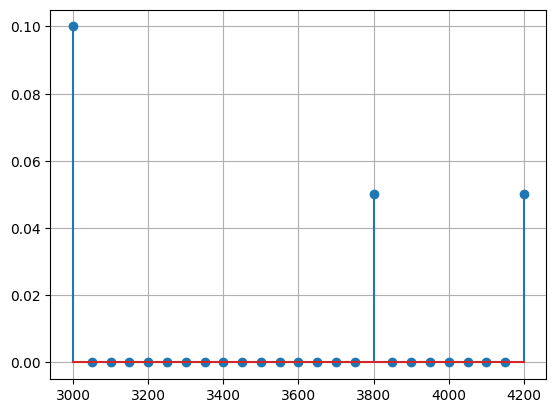

In [108]:
D2 = np.fft.fft(digito2)

print(len(f))
print(len(2*abs(D2)/N))

plt.figure(4)
plt.stem(f[60:85],2*abs(D2[60:85])/N)
plt.grid(True)

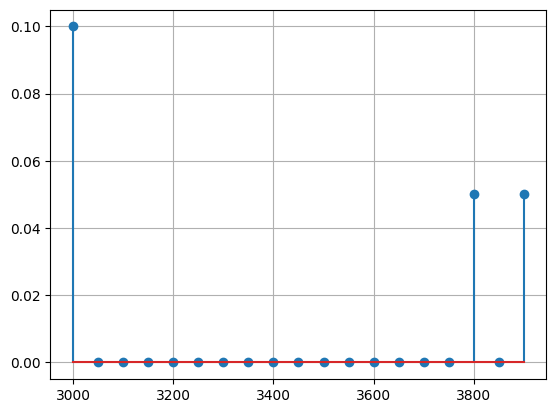

In [111]:
D3 = np.fft.fft(digito3)

plt.figure(5)
plt.stem(f[60:79],2*abs(D3[60:79])/N)
plt.grid(True)

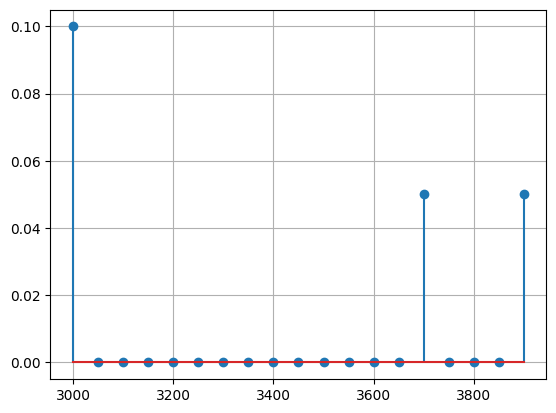

In [115]:
D4 = np.fft.fft(digito4)

plt.figure(6)
plt.stem(f[60:79],2*abs(D4[60:79])/N)
plt.grid(True)

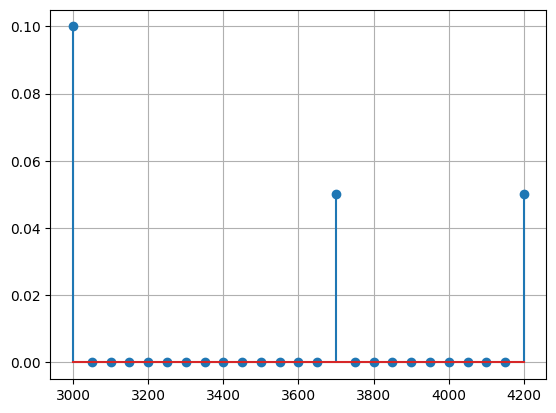

In [118]:
D5 = np.fft.fft(digito5)

plt.figure(5)
plt.stem(f[60:85],2*abs(D5[60:85])/N)
plt.grid(True)

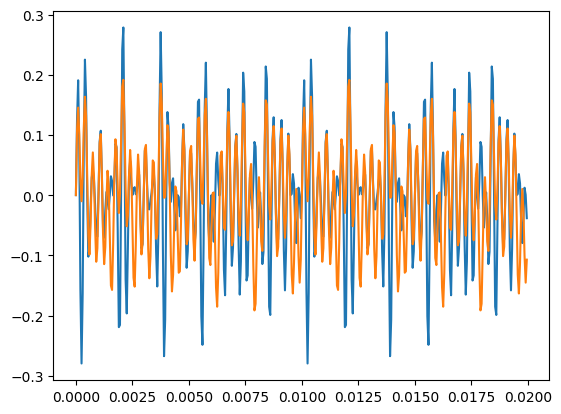

In [134]:
tdigito = np.arange(0, len(digito1)*Ts1, Ts1)

y = 0.1*np.sin(2*pi*3000*tdigito)+0.05*np.sin(2*pi*600*tdigito)+0.05*np.sin(2*pi*1100*tdigito)

plt.figure(7)
plt.clf()
plt.plot(tdigito, digito1)
plt.plot(tdigito, y)
plt.show()